In [1]:
import numpy as np
class Perceptron(object):
    """"
    eta :学习率
    n_iter: 权重向量的训练次数
    w_：神经分叉权重向量
    errors_: 用于记录神经元出错次数
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta=eta;
        self.n_iter =n_iter
        pass
    
    def net_input(self,X):
        """
        z=w0*1+w1*x1+...+wn*xn
        """
        return np.dot(X,self.w_[1:])+self.w_[0]
        pass
        
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,-1)
        pass 
    
    def fit(self,X,y):
        """
        输入训练数据，培训神经元，X输入样本向量，y对应样本分类
        X：shape[n_samples,n_features]
        X:[[1,2,3],[4,5,6]]
        n_samples:2
        n_features:3
        y:[1,-1]
        """
        """
        初始化权重向量为0
        加一是因为前面算法提到的w0,额也就是步调函数阈值
        """
        self.w_=np.zeros(1+X.shape[1])
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors=0
            """
            X:[[1,2,3],[4,5,6]]
            y:[1,-1]
            zip(X,y)=[[1,2,3,1],[4,5,6,-1]]
            """
            for xi, target in zip (X,y):
                """
                update=eta *(y-y')
                """
                update=self.eta *(target-self.predict(xi))
                
                """
                xi是一个向量
                update*xi 等价:
                []...
                """
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                
                errors+=int(update !=0.0)
                self.errors_.append(errors)
                pass
            
            pass
        print('weight:',self.w_)
        pass
    pass
    

In [2]:
file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
import pandas as pd
df= pd.read_csv(file, header=None)
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


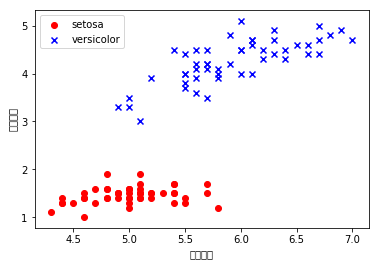

In [3]:
import matplotlib.pyplot as plt
import numpy as np

y=df.loc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)

X=df.loc[0:100,[0,2]].values

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('花瓣长度')
plt.ylabel('花径长度')
plt.legend(loc='upper left')
plt.show()

weight: [-0.4  -0.68  1.82]


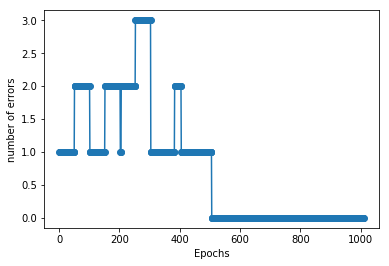

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('number of errors')
plt.show()

In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    marker=('s','x','o','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max=X[:,0].min()-1,X[:,0].max()
    x2_min, x2_max=X[:,1].min()-1,X[:,1].max()
    
    xx1,xx2= np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))

    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    print(xx1.ravel())
    print(xx2.ravel())
    print(Z)
    
    
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),
                    marker=marker[idx],label=cl)
                              

        

[ 3.3   3.32  3.34 ...,  6.94  6.96  6.98]
[ 0.    0.    0.   ...,  5.98  5.98  5.98]
[-1 -1 -1 ...,  1  1  1]


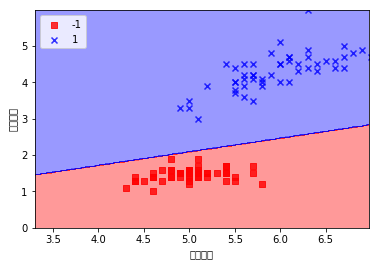

In [8]:
plot_decision_regions(X,y,ppn,resolution=0.02)
plt.xlabel('花径长度')
plt.ylabel('花瓣长度')
plt.legend(loc='upper left')
plt.show()
           

In [19]:
class AdalineGD(object):
    """
    eta:float
    学习效率，处于0和1之间
    
    n_iter:int
    对训练数据进行学习改进次数
    
    w_: 一维向量
    存储权重数值
    
    error_:
    存储每次迭代改进时，网络对数据进行错误判断的次数
    """
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta=eta
        self.n_iter=n_iter
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X):
        return self.net_input(X)
    
    def predict(self,X):
        return np.where(self.activation(X)>=0,1,-1)
    

    def fit(self,X,y):
        """
        X:二维数组[n_sample, n_features]
        n_samples 表示X中含有训练数据条目数
        n_features 含有4个数据的一维向量，用于表示一条训练条目
        
        y:一维向量
        用于存储每一训练条目对应的正确分类
        """
        
        self.w_=np.zeros(1+X.shape[1])
        self.cost_=[]  
        """成本向量， 
        可判断改进效果
        """
        
        for i in range(self.n_iter):
            output= self.net_input(X)
            errors =(y-output)
            self.w_[1:]+=self.eta*X.T.dot(errors)
            self.w_[0]+=self.eta*errors.sum()
            cost=(errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
            

[ 3.3   3.32  3.34 ...,  6.94  6.96  6.98]
[ 0.    0.    0.   ...,  5.98  5.98  5.98]
[-1 -1 -1 ...,  1  1  1]


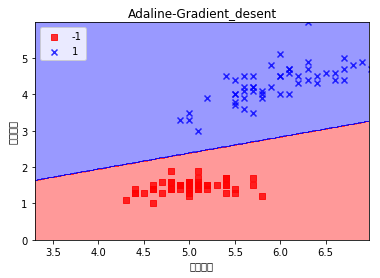

In [20]:
ada=AdalineGD(eta=0.0001,n_iter=50)
ada.fit(X,y)
plot_decision_regions(X,y,classifier=ada)
plt.title('Adaline-Gradient_desent')
plt.xlabel('花径长度')
plt.ylabel('花瓣长度')
plt.legend(loc='upper left')
plt.show()

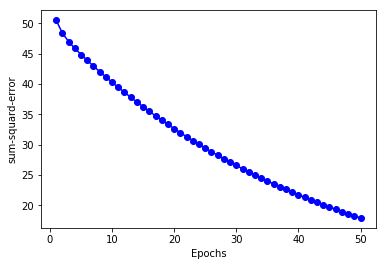

In [26]:
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o',color='blue')
plt.xlabel('Epochs')
plt.ylabel('sum-squard-error')
plt.show()